## Perform multiple linear regression in python
https://datatofish.com/multiple-linear-regression-python/

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
data = xr.open_dataset('nitrate.nc')

In [3]:
data

<xarray.Dataset>
Dimensions:   (mdate: 18026)
Coordinates:
  * mdate     (mdate) float64 1.032e+05 1.032e+05 ... 1.22e+05 1.22e+05
Data variables:
    temp      (mdate) float64 ...
    salinity  (mdate) float64 ...
    sigma     (mdate) float64 ...
    nitrate   (mdate) float64 ...
    stn       (mdate) float64 ...
    pressure  (mdate) float64 ...

In [4]:
nitrate = data.nitrate
salinity = data.salinity
temp = data.temp
sigma = data.sigma

Text(0.5, 0, 'salinity')

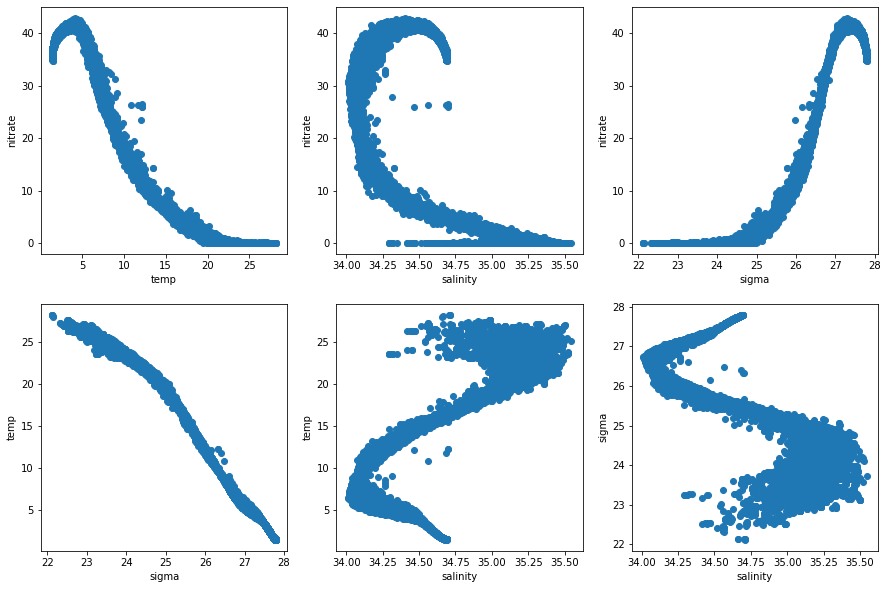

In [5]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,10)

ax[0,0].scatter(temp, nitrate)
ax[0,0].set_ylabel('nitrate')
ax[0,0].set_xlabel('temp')

ax[0,1].scatter(salinity, nitrate)
ax[0,1].set_ylabel('nitrate')
ax[0,1].set_xlabel('salinity')

ax[0,2].scatter(sigma, nitrate)
ax[0,2].set_ylabel('nitrate')
ax[0,2].set_xlabel('sigma')

ax[1,0].scatter(sigma, temp)
ax[1,0].set_ylabel('temp')
ax[1,0].set_xlabel('sigma')

ax[1,1].scatter(salinity, temp)
ax[1,1].set_ylabel('temp')
ax[1,1].set_xlabel('salinity')

ax[1,2].scatter(salinity, sigma)
ax[1,2].set_ylabel('sigma')
ax[1,2].set_xlabel('salinity')

In [19]:
nitrate = {'nitrate': data.nitrate,
           'salinity': data.salinity,
           'temp': data.temp,
           'sigma': data.sigma
           }

In [20]:
df = pd.DataFrame(nitrate,columns=['nitrate','salinity','temp','sigma'])

In [21]:
x = df[['salinity','temp']]
y = df['nitrate']

In [27]:
y

0        0.02
1        0.04
2        0.21
3        2.07
4        2.26
         ... 
18021    0.00
18022    0.40
18023    0.85
18024    1.52
18025    2.13
Name: nitrate, Length: 18026, dtype: float64

In [29]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [30]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 76.7124010752099
Coefficients: 
 [-0.97665871 -1.87860233]


In [23]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }


In [24]:
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

In [25]:
X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']